In [1]:
import pandas as pd

df = pd.read_csv('housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [2]:
X = df.values[:, 0:10]
Y = df.values[:, 10]

In [3]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [4]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print("X_train.shape : ",X_train.shape)
print("X_test.shape : ", X_test.shape)
print("X_val.shape : ", X_val.shape)
print("Y_val.shape : ", Y_val.shape)
print("Y_train.shape : ", Y_train.shape)
print("Y_test.shape : ", Y_test.shape)

X_train.shape :  (1022, 10)
X_test.shape :  (219, 10)
X_val.shape :  (219, 10)
Y_val.shape :  (219,)
Y_train.shape :  (1022,)
Y_test.shape :  (219,)


In [6]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [7]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 14ms/step - loss: 0.6970 - accuracy: 0.4980 - val_loss: 0.6870 - val_accuracy: 0.5525
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6907 - accuracy: 0.4990 - val_loss: 0.6802 - val_accuracy: 0.5571
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6848 - accuracy: 0.5039 - val_loss: 0.6742 - val_accuracy: 0.5662
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6796 - accuracy: 0.5078 - val_loss: 0.6691 - val_accuracy: 0.6027
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6748 - accuracy: 0.5616 - val_loss: 0.6638 - val_accuracy: 0.6804
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6701 - accuracy: 0.6311 - val_loss: 0.6584 - val_accuracy: 0.7306
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6656 - accuracy: 0.6517 - val_loss: 0.6532 - val_accuracy: 0.7626
Epoch 8/100


In [9]:
test_loss,test_accuracy=model.evaluate(X_test, Y_test)

print(test_loss)
print(test_accuracy)

7/7 [==============================] - 0s 7ms/step - loss: 0.2603 - accuracy: 0.9132
0.2602697014808655
0.913241982460022


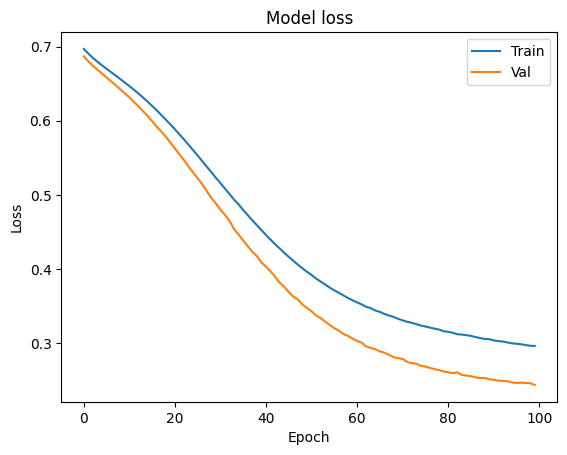

In [10]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

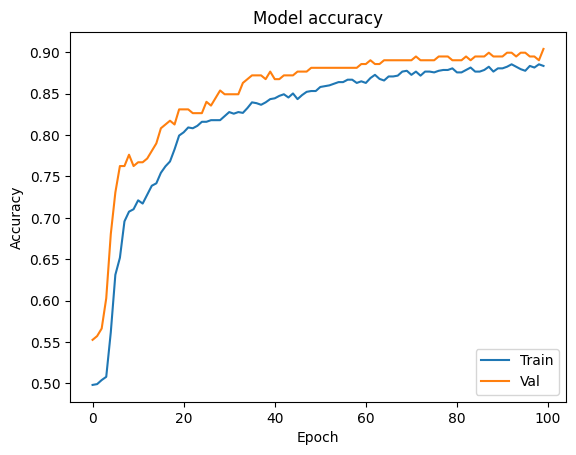

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [12]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 5s 79ms/step - loss: 0.4801 - accuracy: 0.7671 - val_loss: 0.2843 - val_accuracy: 0.8813
Epoch 2/100
32/32 [==============================] - 3s 80ms/step - loss: 0.3714 - accuracy: 0.8503 - val_loss: 0.3279 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 2s 66ms/step - loss: 0.3282 - accuracy: 0.8650 - val_loss: 0.2785 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 2s 64ms/step - loss: 0.3019 - accuracy: 0.8787 - val_loss: 0.2554 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 2s 62ms/step - loss: 0.2775 - accuracy: 0.8924 - val_loss: 0.2275 - val_accuracy: 0.9041
Epoch 6/100
32/32 [==============================] - 2s 73ms/step - loss: 0.2997 - accuracy: 0.8767 - val_loss: 0.2416 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 2s 76ms/step - loss: 0.2746 - accuracy: 0.9041 - val_loss: 0.2233 - val_accuracy: 0.9087
Epoch 

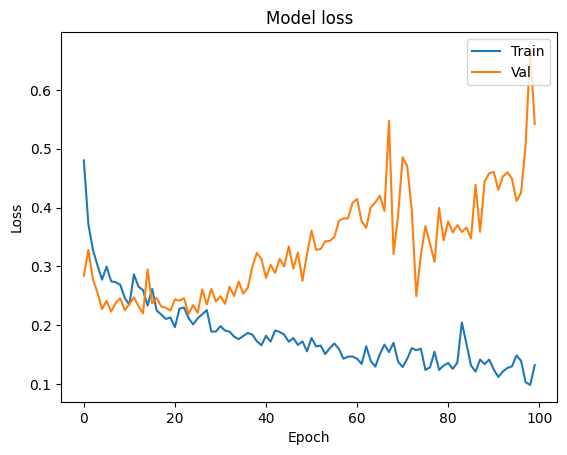

In [13]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

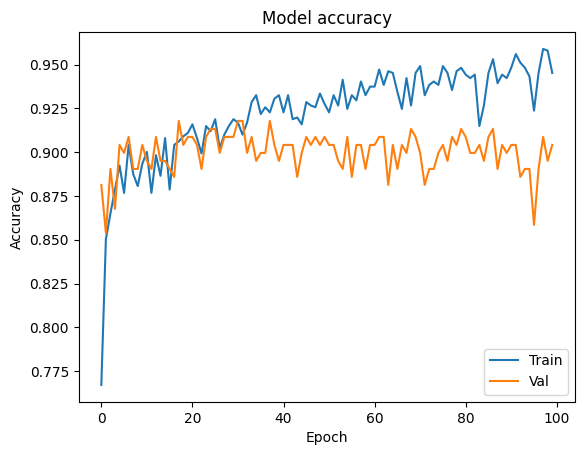

In [14]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [15]:
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer = regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 12s 194ms/step - loss: 14.2308 - accuracy: 0.6840 - val_loss: 3.8553 - val_accuracy: 0.7763
Epoch 2/100
32/32 [==============================] - 5s 160ms/step - loss: 1.6831 - accuracy: 0.8063 - val_loss: 0.6130 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 5s 149ms/step - loss: 0.5729 - accuracy: 0.8454 - val_loss: 0.4644 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 5s 143ms/step - loss: 0.5220 - accuracy: 0.8532 - val_loss: 0.4572 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 3s 107ms/step - loss: 0.5241 - accuracy: 0.8591 - val_loss: 0.4360 - val_accuracy: 0.8995
Epoch 6/100
32/32 [==============================] - 4s 131ms/step - loss: 0.5100 - accuracy: 0.8562 - val_loss: 0.4502 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 4s 117ms/step - loss: 0.4818 - accuracy: 0.8738 - val_loss: 0.4634 - val_accuracy: 0.88

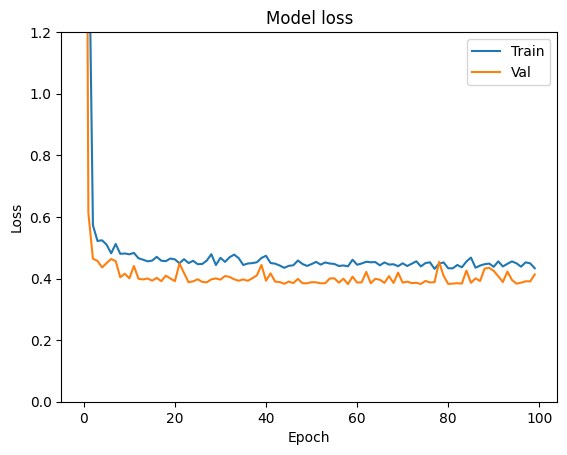

In [16]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

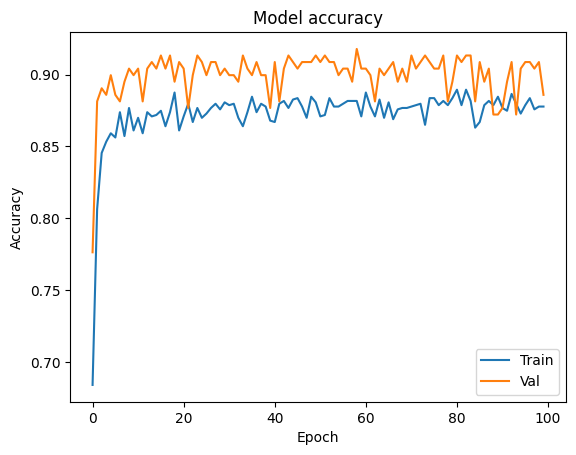

In [17]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [18]:
from sklearn.metrics import recall_score, f1_score, precision_score

In [19]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 3ms/step


In [20]:
y_pred_classes=[]

for prob in y_pred:
    if prob >= 0.5:
        y_pred_classes.append(1)
    else:
        y_pred_classes.append(0)

In [21]:
precision = precision_score(Y_test, y_pred_classes)

recall = recall_score(Y_test, y_pred_classes)

f1 = f1_score(Y_test, y_pred_classes)

print("Precision:", round(precision*100,0))
print("Recall:", round(recall*100,0))
print("F1 Score:", round(f1*100,0))

Precision: 88.0
Recall: 94.0
F1 Score: 91.0


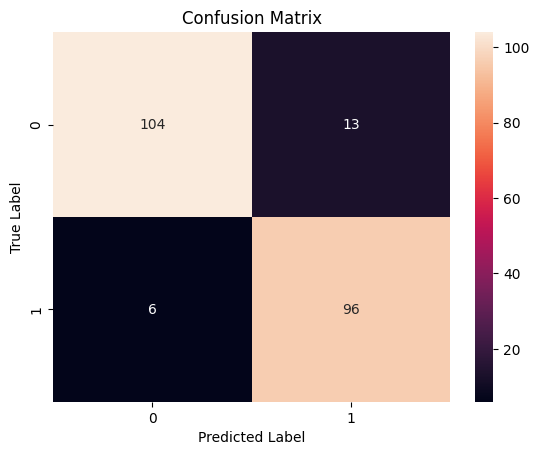

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat = confusion_matrix(Y_test, y_pred_classes)

sns.heatmap(confusion_mat, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [23]:
model.save("houses_model.keras")

In [24]:
from joblib import dump

dump(min_max_scaler, "houses_min_max_scaler.pkl")

['houses_min_max_scaler.pkl']

In [25]:
import numpy as np

new_house = np.array( [[100,6,6,800, 2, 2, 3, 7, 1, 500]])

In [26]:
from joblib import load

min_max_scaler_loaded = load("houses_min_max_scaler.pkl")

new_house = min_max_scaler.transform(new_house)
new_house

array([[-0.00560892,  0.55555556,  0.625     ,  0.1309329 ,  0.66666667,
         1.        ,  0.375     ,  0.41666667,  0.33333333,  0.35260931]])

In [27]:
from keras.models import load_model

loaded_model = load_model("houses_model.keras")

In [28]:
new_prediction_proba = loaded_model.predict(new_house)

new_prediction = (new_prediction_proba > 0.5)

print(new_prediction)

1/1 [==============================] - 0s 174ms/step
[[ True]]
